In [ ]:
#Importamos las librerías necesarias para el programa
import numpy as np
import random
import gymnasium as gym
import matplotlib.pyplot as plt

Monte Carlo Method (Non-Slippery)

In [ ]:
#Defino tanto el espacio de acciones como el entorno del problema
actions={'Left': 0,'Down': 1,'Right': 2,'Up': 3}
env=gym.make('FrozenLake-v1',is_slippery=False)

#Defino el learning rate, número de episodios y el factor ganma
lr=0.7
episodios=200
ganma=0.6

#Lista para los episodios
episode_1=[]
time_step_list=[]
tasa_acierto_1=[]
total_reward=[]
avg_reward=[]

#Inicializo el valor de Q
Q=np.zeros([env.observation_space.n, env.action_space.n])

#Inicializamos el bucle que recorra los episodios
for i in range(episodios):
  #Reseteamos el entorno del sistema
  estado,_=env.reset()
  #Definimos una lista dónde guardar los datos relevantes del episodio
  data_episodio=[]
  #Definimos un parámetro dónde guardar las recompensas y los time steps
  tot_reward=0
  time_step=0

  #Inicializamos el calculo del episodio
  done=False
  while not done:
    #Describimos la acción a tomar por el sistema (la misma que usamos con el Q-learning para compararlos)
    accion=np.argmax(Q[estado,:]+np.random.randn(1,env.action_space.n)*(1./(i+1)))
    #Aplicamos la acción y obtenemos el nuevo estado, recompensa, etc
    estado_nuevo,reward,done,truncated,_=env.step(accion)
    #Guardamos en la lista el nuevo estado del sistema, la acción y la recompensa
    data_episodio.append([estado,accion,reward])
    #Actualizamos el estado del sistema
    estado=estado_nuevo
    #Añadimos un time step
    time_step+=1
    #Añadimos la reward
    tot_reward+=reward

  #Adjunto los valores importantes a las listas previas
  episode_1.append(i+1)
  time_step_list.append(time_step)
  tasa_acierto_1.append(int(tot_reward>0))
  total_reward.append(tot_reward)
  avg_reward.append(tot_reward/time_step)

  #Una vez finalizado todos los time steps del episodio procedemos a calcular los valores de Q del mismo

  #Inicializo a 0 en primer lugar la suma descontada
  R=0
  #Inicializo un bucle que me recorra los estados del episodio
  for estado,accion,reward in reversed(data_episodio):
    #Calculo el valor de R para cada parte del bucle
    R=ganma*R+reward
    #Actualizo el valor de Q
    Q[estado,accion]=Q[estado,accion]+lr*(R-Q[estado,accion])

  #Muestro en pantalla la tasa de acierto de cada episodio
  print(f"Episode: {episode_1[i]}, Success Rate: {tasa_acierto_1[i]*100}")

Episode: 1, Success Rate: 0
Episode: 2, Success Rate: 0
Episode: 3, Success Rate: 100
Episode: 4, Success Rate: 0
Episode: 5, Success Rate: 0
Episode: 6, Success Rate: 100
Episode: 7, Success Rate: 100
Episode: 8, Success Rate: 0
Episode: 9, Success Rate: 0
Episode: 10, Success Rate: 0
Episode: 11, Success Rate: 100
Episode: 12, Success Rate: 100
Episode: 13, Success Rate: 100
Episode: 14, Success Rate: 100
Episode: 15, Success Rate: 100
Episode: 16, Success Rate: 100
Episode: 17, Success Rate: 100
Episode: 18, Success Rate: 100
Episode: 19, Success Rate: 100
Episode: 20, Success Rate: 100
Episode: 21, Success Rate: 100
Episode: 22, Success Rate: 100
Episode: 23, Success Rate: 100
Episode: 24, Success Rate: 100
Episode: 25, Success Rate: 100
Episode: 26, Success Rate: 100
Episode: 27, Success Rate: 100
Episode: 28, Success Rate: 100
Episode: 29, Success Rate: 100
Episode: 30, Success Rate: 100
Episode: 31, Success Rate: 100
Episode: 32, Success Rate: 100
Episode: 33, Success Rate: 100


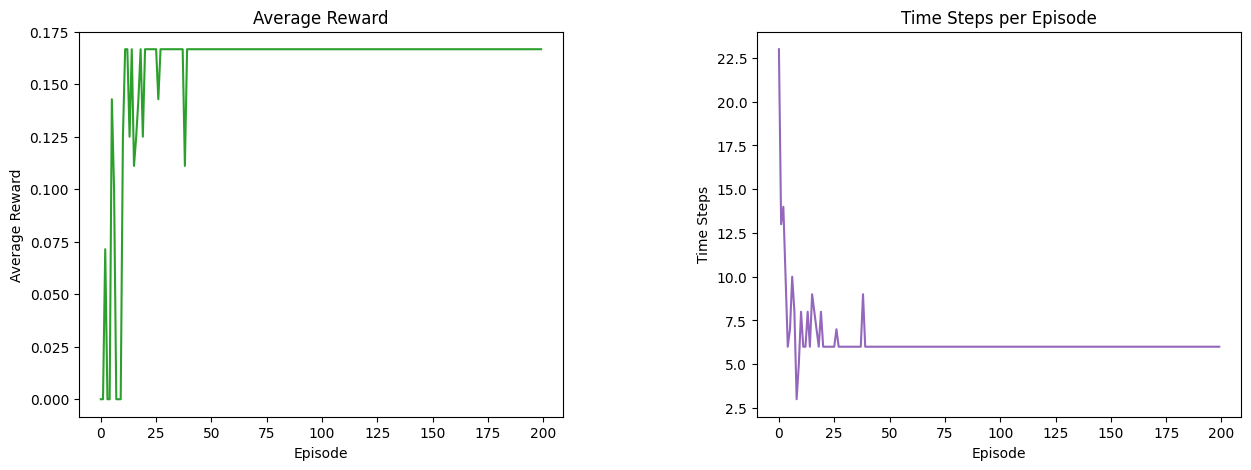

In [ ]:
#Mostramos ahora gráficamente algunas variables notables como la recompensa promedio por episodio y el número de pasos por episodio
fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].plot(avg_reward,'tab:green')
axs[0].set_title('Average Reward')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Average Reward')
axs[1].plot(time_step_list,'tab:purple')
axs[1].set_title('Time Steps per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Time Steps')

plt.subplots_adjust(wspace=0.4)
plt.show()

In the case of the Monte Carlo method for the non-slippery (deterministic) scenario, I have verified that the model learns when the learning rate (lr) is around 0.3 and a gamma of 0.5. This is based on a consideration of approximately 200 episodes. From the previous figures, we can see how the system learns a path to reach the goal in 6 time steps.

Monte Carlo Method (Slippery)

In [ ]:
#Defino tanto el espacio de acciones como el entorno del problema
actions={'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}
env=gym.make('FrozenLake-v1',is_slippery=True)

#Defino el learning rate, número de episodios y el factor ganma
lr=0.8
episodios=1000
ganma=0.9

#Lista para los episodios
episode_1=[]
time_step_list=[]
tasa_acierto_1=[]
total_reward=[]
avg_reward_2=[]

#Inicializo el valor de Q
Q=np.zeros([env.observation_space.n, env.action_space.n])

#Inicializamos el bucle que recorra los episodios
for i in range(episodios):
  #Reseteamos el entorno del sistema
  estado,_=env.reset()
  #Definimos una lista dónde guardar los datos relevantes del episodio
  data_episodio=[]
  #Definimos un parámetro dónde guardar las recompensas y los time steps
  tot_reward=0
  time_step=0

  #Inicializamos el calculo del episodio
  done=False
  while not done:
    #Describimos la acción a tomar por el sistema (la misma que usamos con el Q-learning para compararlos)
    accion=np.argmax(Q[estado,:]+np.random.randn(1,env.action_space.n)*(1./(i+1)))
    #Aplicamos la acción y obtenemos el nuevo estado, recompensa, etc
    estado_nuevo,reward,done,truncated,_=env.step(accion)
    #Guardamos en la lista el nuevo estado del sistema, la acción y la recompensa
    data_episodio.append([estado,accion,reward])
    #Actualizamos el estado del sistema
    estado=estado_nuevo
    #Añadimos un time step
    time_step+=1
    #Añadimos la reward
    tot_reward+=reward

  #Adjunto los valores importantes a las listas previas
  episode_1.append(i+1)
  time_step_list.append(time_step)
  tasa_acierto_1.append(int(tot_reward>0))
  total_reward.append(tot_reward)
  avg_reward_2.append(tot_reward/time_step)

  #Una vez finalizado todos los time steps del episodio procedemos a calcular los valores de Q del mismo

  #Inicializo a 0 en primer lugar la suma descontada
  R=0
  #Inicializo un bucle que me recorra los estados del episodio
  for estado,accion,reward in reversed(data_episodio):
    #Calculo el valor de R para cada parte del bucle
    R=ganma*R+reward
    #Actualizo el valor de Q
    Q[estado,accion]=Q[estado,accion]+lr*(R-Q[estado,accion])

  #Muestro en pantalla la tasa de acierto de cada episodio
  print(f"Episode: {episode_1[i]}, Success Rate: {tasa_acierto_1[i]*100}")

Episode: 1, Success Rate: 0
Episode: 2, Success Rate: 0
Episode: 3, Success Rate: 0
Episode: 4, Success Rate: 0
Episode: 5, Success Rate: 0
Episode: 6, Success Rate: 0
Episode: 7, Success Rate: 0
Episode: 8, Success Rate: 0
Episode: 9, Success Rate: 0
Episode: 10, Success Rate: 0
Episode: 11, Success Rate: 0
Episode: 12, Success Rate: 0
Episode: 13, Success Rate: 0
Episode: 14, Success Rate: 0
Episode: 15, Success Rate: 0
Episode: 16, Success Rate: 0
Episode: 17, Success Rate: 0
Episode: 18, Success Rate: 0
Episode: 19, Success Rate: 0
Episode: 20, Success Rate: 0
Episode: 21, Success Rate: 0
Episode: 22, Success Rate: 0
Episode: 23, Success Rate: 0
Episode: 24, Success Rate: 0
Episode: 25, Success Rate: 0
Episode: 26, Success Rate: 0
Episode: 27, Success Rate: 0
Episode: 28, Success Rate: 0
Episode: 29, Success Rate: 0
Episode: 30, Success Rate: 0
Episode: 31, Success Rate: 0
Episode: 32, Success Rate: 0
Episode: 33, Success Rate: 0
Episode: 34, Success Rate: 0
Episode: 35, Success Ra

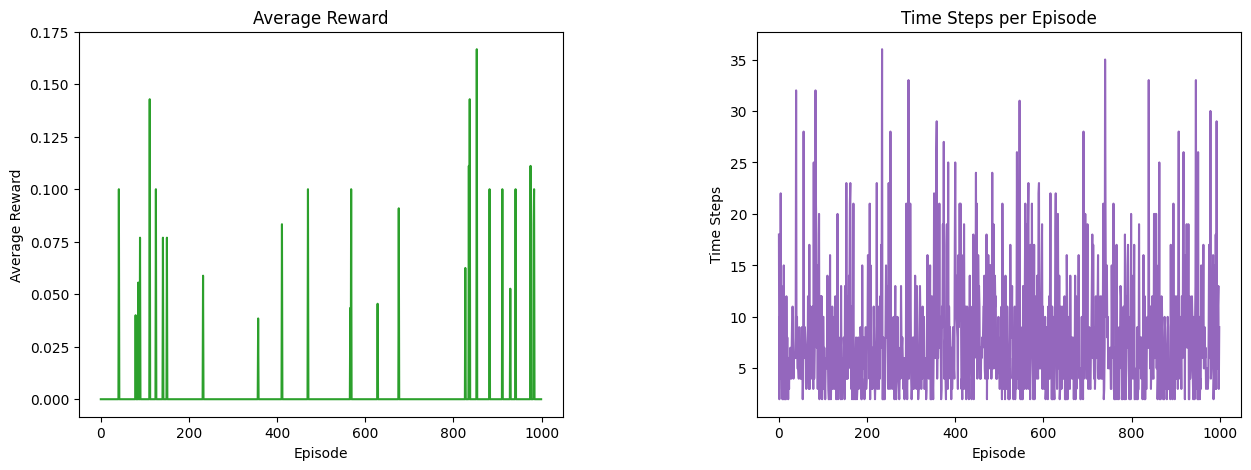

In [ ]:
#De nuevo vamos a graficar algunas variables que ayudan a entender el funcionamiento del modelo
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(avg_reward_2,'tab:green')
axs[0].set_title('Average Reward')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Average Reward')
axs[1].plot(time_step_list,'tab:purple')
axs[1].set_title('Time Steps per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Time Steps')

plt.subplots_adjust(wspace=0.4)
plt.show()

In the slippery case, by changing the values of the learning rate and gamma, I was able to confirm that the model does not seem to learn for any value, even with a high number of episodes.

SARSA Method (Non-Slippery)

In [ ]:
#Inicialiamos nuestro entorno
actions_3={'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}
env_3=gym.make('FrozenLake-v1',is_slippery=False)

#Definimos ahora las variables importantes del sistema
lr_3=0.8
num_episodios_3=200
ganma_3=0.6

#Inicializamos el valor de Q
Q_3=np.zeros([env_3.observation_space.n,env_3.action_space.n])

#Inicializamos las listas para guardar las variables importantes
tasa_acierto_3=[]
episode_3=[]
time_step_list_3=[]
total_reward_3=[]
avg_reward_3=[]

#Inicializamos el bucle que recorra los episodios
for i in range(num_episodios_3):
  #Reseteamos el entorno
  estado_3,_=env_3.reset()
  #Inicializamos a 0 una variable para las recompensas y otra para los time steps
  recompensas_3=0
  n_steps_3=0
  #Inicializamos la primera acción del episodio
  accion_3=np.argmax(Q_3[estado_3,:]+np.random.randn(1,env_3.action_space.n)*(1./(i+1)))

  #Incializamos la evolución a lo largo del episodio
  done=False

  while not done:
    #Aplicamos la acción al enviroment
    estado_nuevo_3,reward_3,done,truncated_3,_=env_3.step(accion_3)
    #Generamos una nueva acción correspondiente al siguiente estado del sistema
    accion_nueva_3=np.argmax(Q_3[estado_nuevo_3,:]+np.random.randn(1,env_3.action_space.n)*(1./(i+1)))
    #Actualizamos el valor de Q
    Q_3[estado_3,accion_3]+=lr_3*(reward_3+ganma_3*Q_3[estado_nuevo_3,accion_nueva_3]-Q_3[estado_3,accion_3])
    #Actualizamos la acción y el estado del sistema
    accion_3=accion_nueva_3
    estado_3=estado_nuevo_3
    #Añadimos las recompensas
    recompensas_3+=reward_3
    #Añadimos un time step
    n_steps_3+=1

  #Añadimos las variables a las listas
  tasa_acierto_3.append(int(recompensas_3>0))
  episode_3.append(i+1)
  time_step_list_3.append(n_steps_3)
  total_reward_3.append(recompensas_3)
  avg_reward_3.append(recompensas_3/n_steps_3)

  #Mostramos en pantalla la tasa de acierto del sistema
  print(f"Episode: {episode_3[i]}, Success Rate: {tasa_acierto_3[i]*100}")

Episode: 1, Success Rate: 0
Episode: 2, Success Rate: 0
Episode: 3, Success Rate: 0
Episode: 4, Success Rate: 0
Episode: 5, Success Rate: 0
Episode: 6, Success Rate: 0
Episode: 7, Success Rate: 0
Episode: 8, Success Rate: 0
Episode: 9, Success Rate: 0
Episode: 10, Success Rate: 0
Episode: 11, Success Rate: 0
Episode: 12, Success Rate: 0
Episode: 13, Success Rate: 0
Episode: 14, Success Rate: 0
Episode: 15, Success Rate: 0
Episode: 16, Success Rate: 0
Episode: 17, Success Rate: 0
Episode: 18, Success Rate: 0
Episode: 19, Success Rate: 0
Episode: 20, Success Rate: 0
Episode: 21, Success Rate: 0
Episode: 22, Success Rate: 0
Episode: 23, Success Rate: 0
Episode: 24, Success Rate: 0
Episode: 25, Success Rate: 0
Episode: 26, Success Rate: 0
Episode: 27, Success Rate: 0
Episode: 28, Success Rate: 0
Episode: 29, Success Rate: 0
Episode: 30, Success Rate: 0
Episode: 31, Success Rate: 0
Episode: 32, Success Rate: 0
Episode: 33, Success Rate: 0
Episode: 34, Success Rate: 0
Episode: 35, Success Ra

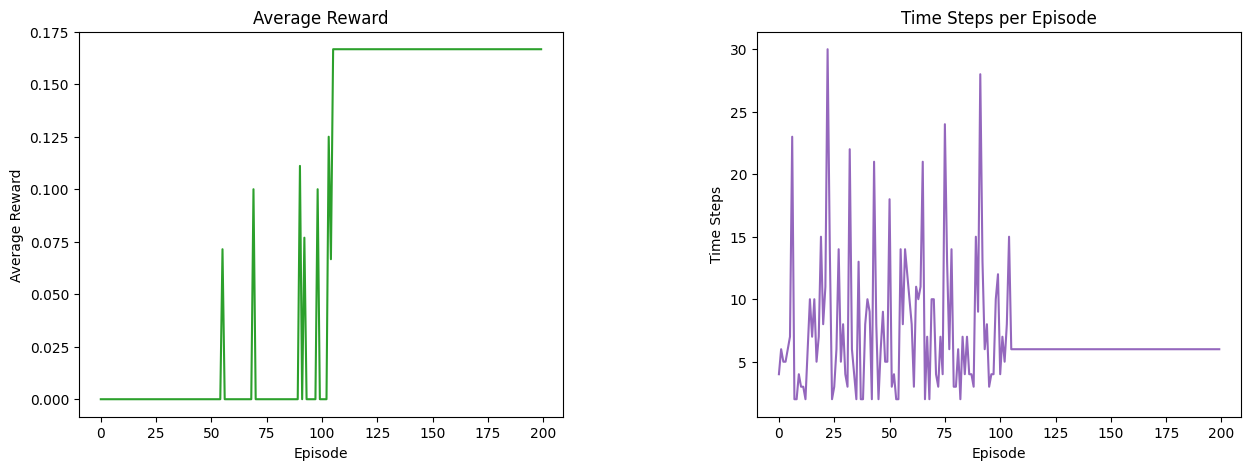

In [ ]:
#Representamos algunas variables del sistema para facilitar el análisis del modelo
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(avg_reward_3,'tab:green')
axs[0].set_title('Average Reward')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Average Reward')
axs[1].plot(time_step_list_3,'tab:purple')
axs[1].set_title('Time Steps per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Time Steps')

plt.subplots_adjust(wspace=0.4)
plt.show()

In the non-slippery (deterministic) case, we have found that for the SARSA model, the system also begins to learn with low learning rate values around 0.2/0.3 and a gamma value around 0.5. As shown in the previous figures, the model eventually learns a path that reaches the goal in 6 steps.

SARSA Method (Slippery)

In [ ]:
#Inicialiamos nuestro entorno
actions_3={'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}
env_3=gym.make('FrozenLake-v1',is_slippery=True)

#Definimos ahora las variables importantes del sistema
lr_3=0.8
num_episodios_3=400
ganma_3=0.8

#Inicializamos el valor de Q
Q_3=np.zeros([env_3.observation_space.n,env_3.action_space.n])

#Inicializamos las listas para guardar las variables importantes
tasa_acierto_3=[]
episode_3=[]
time_step_list_3=[]
total_reward_3=[]
avg_reward_3=[]

#Inicializamos el bucle que recorra los episodios
for i in range(num_episodios_3):
  #Reseteamos el entorno
  estado_3,_=env_3.reset()
  #Inicializamos a 0 una variable para las recompensas y otra para los time steps
  recompensas_3=0
  n_steps_3=0
  #Inicializamos la primera acción del episodio
  accion_3=np.argmax(Q_3[estado_3,:]+np.random.randn(1,env_3.action_space.n)*(1./(i+1)))

  #Incializamos la evolución a lo largo del episodio
  done=False
  while not done:
    #Aplicamos la acción al enviroment
    estado_nuevo_3,reward_3,done,truncated_3,_=env_3.step(accion_3)
    #Generamos una nueva acción correspondiente al siguiente estado del sistema
    accion_nueva_3=np.argmax(Q_3[estado_nuevo_3,:]+np.random.randn(1,env_3.action_space.n)*(1./(i+1)))
    #Actualizamos el valor de Q
    Q_3[estado_3,accion_3]+=lr_3*(reward_3+ganma_3*Q_3[estado_nuevo_3,accion_nueva_3]-Q_3[estado_3,accion_3])
    #Actualizamos la acción y el estado del sistema
    accion_3=accion_nueva_3
    estado_3=estado_nuevo_3
    #Añadimos las recompensas
    recompensas_3+=reward_3
    #Añadimos un time step
    n_steps_3+=1

  #Añadimos las variables a las listas
  tasa_acierto_3.append(int(recompensas_3>0))
  episode_3.append(i+1)
  time_step_list_3.append(n_steps_3)
  total_reward_3.append(recompensas_3)
  avg_reward_3.append(recompensas_3/n_steps_3)

  #Mostramos en pantalla la tasa de acierto del sistema
  print(f"Episode: {episode_3[i]}, Success Rate: {tasa_acierto_3[i]*100}")

Episode: 1, Success Rate: 0
Episode: 2, Success Rate: 0
Episode: 3, Success Rate: 0
Episode: 4, Success Rate: 0
Episode: 5, Success Rate: 0
Episode: 6, Success Rate: 0
Episode: 7, Success Rate: 0
Episode: 8, Success Rate: 0
Episode: 9, Success Rate: 0
Episode: 10, Success Rate: 100
Episode: 11, Success Rate: 0
Episode: 12, Success Rate: 0
Episode: 13, Success Rate: 0
Episode: 14, Success Rate: 0
Episode: 15, Success Rate: 0
Episode: 16, Success Rate: 0
Episode: 17, Success Rate: 0
Episode: 18, Success Rate: 0
Episode: 19, Success Rate: 0
Episode: 20, Success Rate: 0
Episode: 21, Success Rate: 0
Episode: 22, Success Rate: 0
Episode: 23, Success Rate: 0
Episode: 24, Success Rate: 0
Episode: 25, Success Rate: 0
Episode: 26, Success Rate: 0
Episode: 27, Success Rate: 0
Episode: 28, Success Rate: 0
Episode: 29, Success Rate: 0
Episode: 30, Success Rate: 0
Episode: 31, Success Rate: 0
Episode: 32, Success Rate: 0
Episode: 33, Success Rate: 0
Episode: 34, Success Rate: 0
Episode: 35, Success 

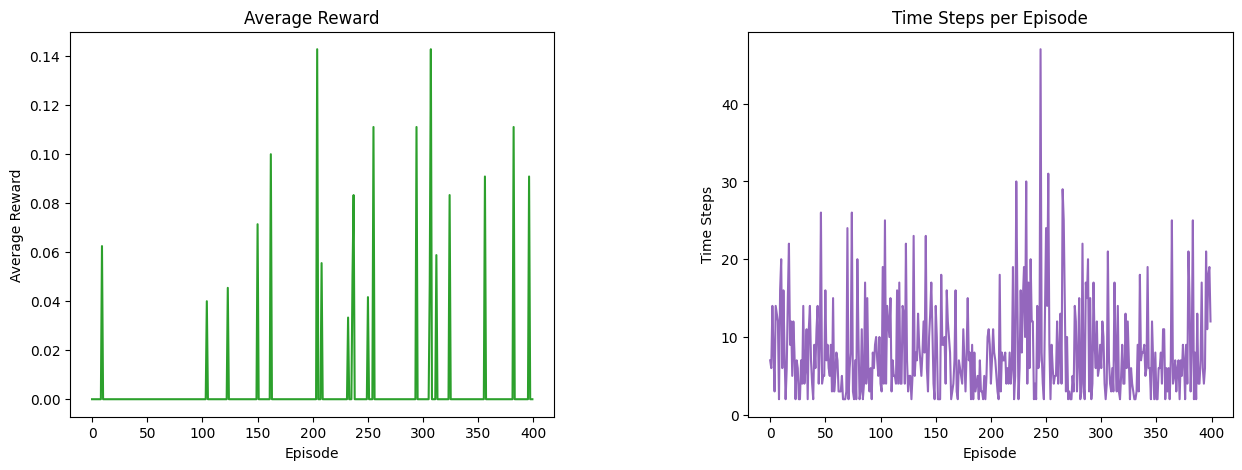

In [ ]:
#Representamos algunas de las variables del sistema para facilitar el análisis
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(avg_reward_3,'tab:green')
axs[0].set_title('Average Reward')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Average Reward')
axs[1].plot(time_step_list_3,'tab:purple')
axs[1].set_title('Time Steps per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Time Steps')

plt.subplots_adjust(wspace=0.4)
plt.show()

Again, as was the case with Monte Carlo, the system does not learn a path to reach the goal for any value of the learning rate or gamma.

Q-Learning Method (Non-Slippery)

In [ ]:
#Inicializamos el entorno
actions_4={'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}
env_4=gym.make('FrozenLake-v1',is_slippery=False)

#Definimos las variables importantes del sistema
lr_4=0.8
num_episodios_4=200
ganma_4=0.6

#Inicializamos el valor de Q
Q_4=np.zeros((env_4.observation_space.n,env_4.action_space.n))

#Inicializamos las listas para guardar las variables importantes
tasa_acierto_4=[]
episode_4=[]
time_step_list_4=[]
total_reward_4=[]
avg_reward_4=[]

#Inicializamos el bucle que recorra los episodios
for i in range(num_episodios_4):
    estado_4,_=env_4.reset()
    recompensas_4=0
    n_steps_4=0
    done = False
    while not done:
        try:
            estado_4=estado_4[0]
        except TypeError:
            pass
        accion_4=np.argmax(Q_4[estado_4,:]+np.random.randn(1,env_4.action_space.n)*(1./(i+1)))
        estado_nuevo_4,reward_4,done, truncated_4,_=env_4.step(accion_4)
        Q_4[estado_4,accion_4]=Q_4[estado_4,accion_4]+lr_4*(reward_4+ganma_4*np.max(Q_4[estado_nuevo_4,:])-Q_4[estado_4,accion_4])
        estado_4=estado_nuevo_4
        recompensas_4+=reward_4
        n_steps_4+=1

    #Añadimos ahora las variables importantes a las listas
    tasa_acierto_4.append(int(recompensas_4>0))
    episode_4.append(i+1)
    time_step_list_4.append(n_steps_4)
    total_reward_4.append(recompensas_4)
    avg_reward_4.append(recompensas_4/n_steps_4)

    #Ponemos en pantalla la tasa de acierto del sistema
    print(f"Episode: {episode_4[i]}, Success Rate: {tasa_acierto_4[i]*100}")

Episode: 1, Success Rate: 0
Episode: 2, Success Rate: 0
Episode: 3, Success Rate: 0
Episode: 4, Success Rate: 0
Episode: 5, Success Rate: 0
Episode: 6, Success Rate: 0
Episode: 7, Success Rate: 0
Episode: 8, Success Rate: 100
Episode: 9, Success Rate: 0
Episode: 10, Success Rate: 0
Episode: 11, Success Rate: 0
Episode: 12, Success Rate: 0
Episode: 13, Success Rate: 0
Episode: 14, Success Rate: 0
Episode: 15, Success Rate: 0
Episode: 16, Success Rate: 0
Episode: 17, Success Rate: 0
Episode: 18, Success Rate: 0
Episode: 19, Success Rate: 0
Episode: 20, Success Rate: 0
Episode: 21, Success Rate: 0
Episode: 22, Success Rate: 0
Episode: 23, Success Rate: 0
Episode: 24, Success Rate: 0
Episode: 25, Success Rate: 0
Episode: 26, Success Rate: 0
Episode: 27, Success Rate: 0
Episode: 28, Success Rate: 100
Episode: 29, Success Rate: 0
Episode: 30, Success Rate: 0
Episode: 31, Success Rate: 0
Episode: 32, Success Rate: 0
Episode: 33, Success Rate: 0
Episode: 34, Success Rate: 0
Episode: 35, Succes

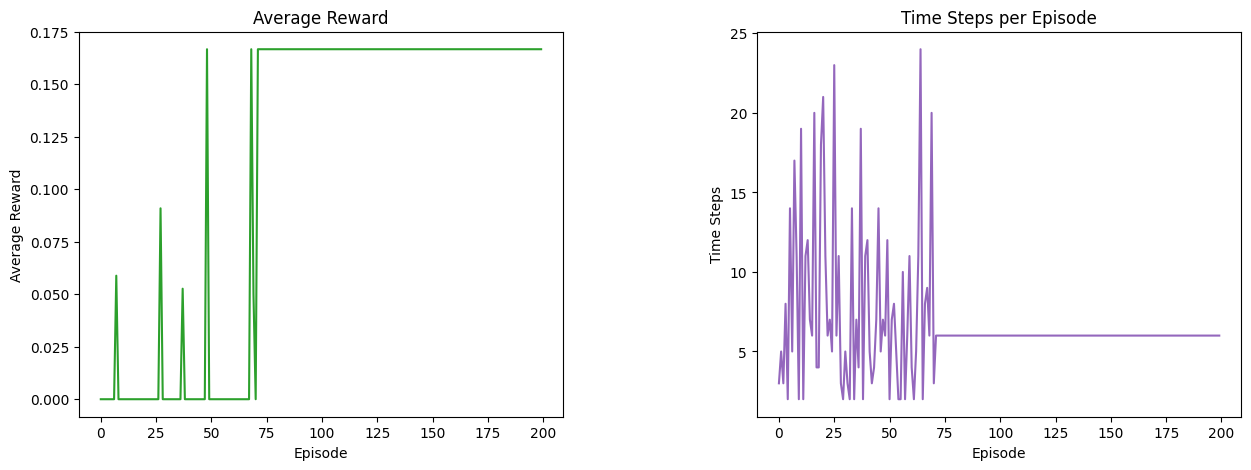

In [ ]:
#Representamos algunas variables notables del sistema
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(avg_reward_4,'tab:green')
axs[0].set_title('Average Reward')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Average Reward')
axs[1].plot(time_step_list_4,'tab:purple')
axs[1].set_title('Time Steps per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Time Steps')

plt.subplots_adjust(wspace=0.4)
plt.show()

With the Q-learning model, for the non-slippery (deterministic) case, the system again manages to learn a path of 6 time steps to reach the goal. Also, as was the case with Monte Carlo and SARSA, the system learns this path with low learning rate values around 0.2/0.3 and a gamma of 0.5.

Q-Learning Method (Slippery)

In [ ]:
#Inicializamos el entorno
actions_4={'Left': 0, 'Down': 1, 'Right': 2, 'Up': 3}
env_4=gym.make('FrozenLake-v1',is_slippery=True)

#Definimos las variables importantes del sistema
lr_4=0.3
num_episodios_4=500
ganma_4=0.5

#Inicializamos el valor de Q
Q_4=np.zeros((env_4.observation_space.n,env_4.action_space.n))

#Inicializamos las listas para guardar las variables importantes
tasa_acierto_4=[]
episode_4=[]
time_step_list_4=[]
total_reward_4=[]
avg_reward_4=[]

#Inicializamos el bucle que recorra los episodios
for i in range(num_episodios_4):
    estado_4,_=env_4.reset()
    recompensas_4=0
    n_steps_4=0
    done = False
    while not done:
        try:
            estado_4=estado_4[0]
        except TypeError:
            pass
        accion_4=np.argmax(Q_4[estado_4,:]+np.random.randn(1,env_4.action_space.n)*(1./(i+1)))
        estado_nuevo_4,reward_4,done,truncated_4,_=env_4.step(accion_4)
        Q_4[estado_4,accion_4]=Q_4[estado_4,accion_4]+lr_4*(reward_4+ganma_4*np.max(Q_4[estado_nuevo_4,:])-Q_4[estado_4,accion_4])
        estado_4=estado_nuevo_4
        recompensas_4+=reward_4
        n_steps_4+=1

    #Añadimos ahora las variables importantes a las listas
    tasa_acierto_4.append(int(recompensas_4>0))
    episode_4.append(i+1)
    time_step_list_4.append(n_steps_4)
    total_reward_4.append(recompensas_4)
    avg_reward_4.append(recompensas_4/n_steps_4)

    #Ponemos en pantalla la tasa de acierto del sistema
    print(f"Episode: {episode_4[i]}, Success Rate: {tasa_acierto_4[i]*100}")

Episode: 1, Success Rate: 0
Episode: 2, Success Rate: 0
Episode: 3, Success Rate: 0
Episode: 4, Success Rate: 0
Episode: 5, Success Rate: 0
Episode: 6, Success Rate: 0
Episode: 7, Success Rate: 0
Episode: 8, Success Rate: 0
Episode: 9, Success Rate: 0
Episode: 10, Success Rate: 0
Episode: 11, Success Rate: 0
Episode: 12, Success Rate: 100
Episode: 13, Success Rate: 0
Episode: 14, Success Rate: 0
Episode: 15, Success Rate: 0
Episode: 16, Success Rate: 0
Episode: 17, Success Rate: 0
Episode: 18, Success Rate: 0
Episode: 19, Success Rate: 0
Episode: 20, Success Rate: 0
Episode: 21, Success Rate: 0
Episode: 22, Success Rate: 0
Episode: 23, Success Rate: 0
Episode: 24, Success Rate: 0
Episode: 25, Success Rate: 0
Episode: 26, Success Rate: 0
Episode: 27, Success Rate: 0
Episode: 28, Success Rate: 0
Episode: 29, Success Rate: 0
Episode: 30, Success Rate: 0
Episode: 31, Success Rate: 0
Episode: 32, Success Rate: 100
Episode: 33, Success Rate: 0
Episode: 34, Success Rate: 0
Episode: 35, Succes

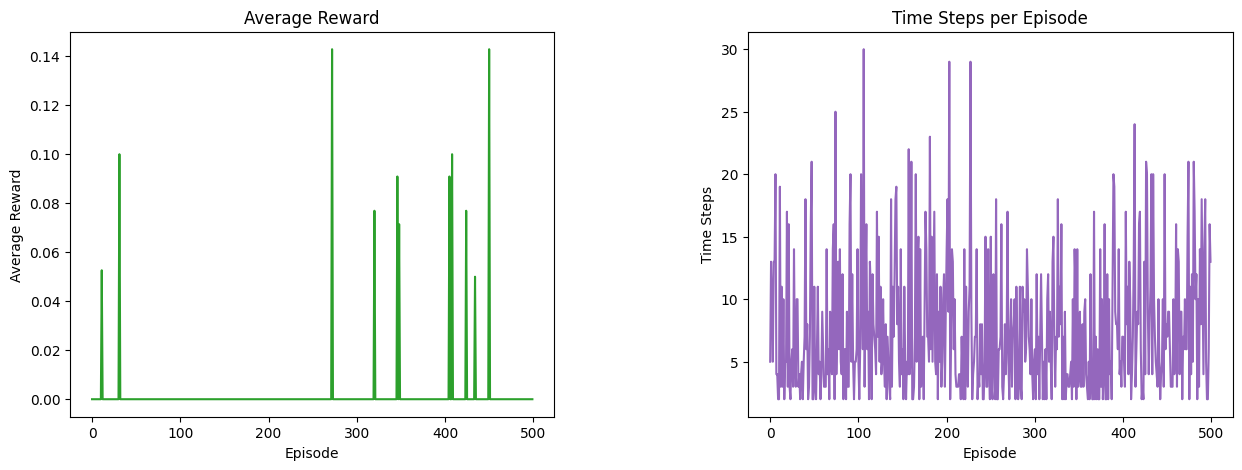

In [ ]:
#Representamos algunas variables relevantes del sistema
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(avg_reward_4,'tab:green')
axs[0].set_title('Average Reward')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Average Reward')
axs[1].plot(time_step_list_4,'tab:purple')
axs[1].set_title('Time Steps per Episode')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Time Steps')

plt.subplots_adjust(wspace=0.4)
plt.show()

Again, as was the case with the other models for the slippery (stochastic) scenario, the model is unable to learn a path to reach the goal, even with a high number of episodes.